<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آزمون فرض
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
●	به نظر شما درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری با هم برابر است؟
</font>
</p>

In [8]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm, expon


In [2]:
# some utility functions
def convert_float(data):
    try:
        if pd.isna(data):  
            return 0
        else:
            return float(data)
    except:  
        return 0

In [3]:
# file names and directories
data_dir = '../Data/'
R_files = ['R98', 'R99', 'R1400', 'R1401']
U_files = ['U98', 'U99', 'U1400', 'U1401']

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بررسی داده‌ها نشان می‌دهد که درآمد‌ها در بخش چهارم هستند.
در این بخش چهار قسمت داریم که باید درآمدهای خانوار در هر یک از این بخش‌ها جمع زده شود.
</font>
<font face="vazir" size=3>
همچنین از آنجا که می‌دانیم به علت تورم درآمدها سال به سال بیشتر شده است برای کاهش تاثیر این مسئله هر سال را جداگانه بررسی می‌کنیم.
</font>
</p>

In [4]:
def extract_income(files):
    income = []
    for file_name in files:
        # calculating Income column for each file
        # Section 1
        s1 = pd.read_excel(f'../Data/{file_name}.xlsx', sheet_name=(file_name+'P4S01'))
        s1 = s1[['Address', 'netincome_w_y']].rename(columns={'netincome_w_y': 'Income'})
        # Section 2
        s2 = pd.read_excel(f'../Data/{file_name}.xlsx', sheet_name=(file_name+'P4S02'))
        s2['income_s_y'] = s2['income_s_y'].apply(convert_float)
        s2 = s2[['Address', 'income_s_y']].rename(columns={'income_s_y': 'Income'})
        # Section 3        
        s3 = pd.read_excel(f'../Data/{file_name}.xlsx', sheet_name=(file_name+'P4S03'))
        s3['income_pension'] = s3['income_pension'].apply(convert_float)
        s3['income_rent'] = s3['income_rent'].apply(convert_float)
        s3['income_interest'] = s3['income_interest'].apply(convert_float)
        s3['income_aid'] = s3['income_aid'].apply(convert_float)
        s3['income_resale'] = s3['income_resale'].apply(convert_float)
        s3['income_transfer'] = s3['income_transfer'].apply(convert_float)
        s3['Income'] =  (s3['income_pension'] + 
                s3['income_rent'] + 
                s3['income_interest'] + 
                s3['income_aid'] + 
                s3['income_resale'] + 
                s3['income_transfer'])
        s3 = s3[['Address', 'Income']]
        # Section 4
        s4 = pd.read_excel(f'../Data/{file_name}.xlsx', sheet_name=(file_name+'P4S04'))
        s4 = s4[['Address', 'subsidy']].rename(columns={'subsidy': 'Income'})
        total = pd.concat([s1, s2, s3, s4])
        total_grouped = total.groupby('Address').agg({'Income': 'sum'}).reset_index()
        
        # filter addresses for specified region with code: 14
        total_grouped['region'] = total_grouped['Address'].apply(lambda x: str(x)[1:3])
        total_grouped = total_grouped[total_grouped['region'] == '14']
        total_grouped.drop('region', axis=1, inplace=True)
        income.append(total_grouped)
    return income

In [5]:
R_income = extract_income(R_files)

In [6]:
U_income = extract_income(U_files)

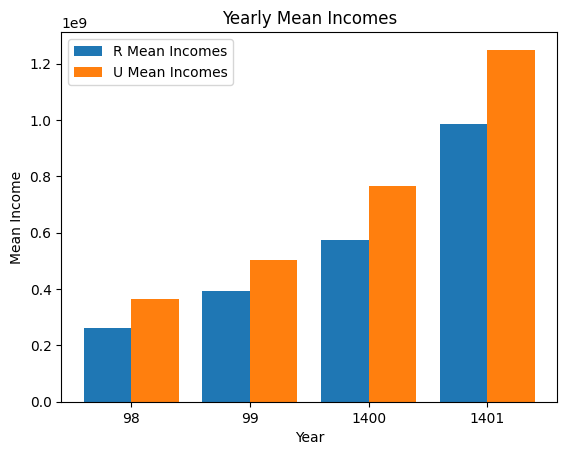

In [7]:
R_yearly_mean_incomes = {
    '98': np.mean(R_income[0]['Income']),
    '99': np.mean(R_income[1]['Income']),
    '1400': np.mean(R_income[2]['Income']),
    '1401': np.mean(R_income[3]['Income']),
}
U_yearly_mean_incomes = {
    '98': np.mean(U_income[0]['Income']),
    '99': np.mean(U_income[1]['Income']),
    '1400': np.mean(U_income[2]['Income']),
    '1401': np.mean(U_income[3]['Income']),
}

years = list(R_yearly_mean_incomes.keys())
R_mean_incomes = list(R_yearly_mean_incomes.values())
U_mean_incomes = list(U_yearly_mean_incomes.values())

# Set positions for the bars
bar_width = 0.4
x = np.arange(len(years))

# Plot bars for R_mean_incomes
plt.bar(x - bar_width/2, R_mean_incomes, bar_width, label='R Mean Incomes', color='#1f77b4')

# Plot bars for U_mean_incomes
plt.bar(x + bar_width/2, U_mean_incomes, bar_width, label='U Mean Incomes', color='#ff7f0e')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Income')
plt.title('Yearly Mean Incomes')
plt.xticks(x, years)  # Set x-ticks to the year labels
plt.legend()  # Show the legend

# Show the plot
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار میانگین درآمد سال به سال نشان‌ می‌دهد که درآمد‌های شهری و روستایی استان چهار محال و بختیاری یکسان نیستند.
حال آزمون فرض زیر را برای هر سال بررسی می‌کنیم:
</font>
</p>

\begin{align*}
& H_{0}: \mu_{R} = \mu_{U}\\
& H_{1}: \mu_{R} \neq \mu_{U}\\
\end{align*}

In [22]:
# year 1398
t_statistic, p_value = sp.stats.ttest_ind(R_income[0]['Income'], U_income[0]['Income'])
round(p_value,2)

0.0

In [21]:
# year 1399
t_statistic, p_value = sp.stats.ttest_ind(R_income[1]['Income'], U_income[1]['Income'])
round(p_value,2)

0.0

In [20]:
# year 1400
t_statistic, p_value = sp.stats.ttest_ind(R_income[2]['Income'], U_income[2]['Income'])
round(p_value,2)

0.0

In [19]:
# year 1401
t_statistic, p_value = sp.stats.ttest_ind(R_income[3]['Income'], U_income[3]['Income'])
round(p_value,2)

0.0

for years 1398-1401: P_value is 0

H<sub>0</sub> is rejected

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
محاسبات بالا نشان می‌دهد که برای سال‌های ۱۳۹۸ تا ۱۴۰۱ در استان چهار محال و بختیاری درآمد شهری با درآمد روستایی برابر نیستند.
</font>
</p>